<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;">✈️ <b>Flight Fare Prediction Model</b></h2>

<p style="color:#333333;">This model predicts airline ticket prices based on <b>airline</b>, <b>class</b>, and <b>days left before departure</b>.</p>

<p style="color:#333333;">It uses <b>machine learning techniques</b> to uncover patterns from historical data.</p>

<p style="color:#333333;">The goal is to help users <b>plan smarter</b>, <b>save costs</b>, and <b>make informed travel decisions</b>.</p>

</div>

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Library Imports and Setup</b></h2>

<p style="color:#333333;">All necessary Python libraries are imported to support data loading, visualization, machine learning modeling, and evaluation:</p>

<ul style="color:#333333;">
<li><b>pandas, numpy</b>: For data manipulation and numerical operations.</li>
<li><b>matplotlib, seaborn</b>: For creating clear and insightful visualizations.</li>
<li><b>scikit-learn modules</b>: For preprocessing, model building (Linear Regression, Random Forest, Gradient Boosting, Extra Trees), model evaluation, and hyperparameter tuning.</li>
<li><b>joblib</b>: For saving trained machine learning models.</li>
<li><b>warnings</b>: To suppress unnecessary warnings and maintain a clean notebook environment.</li>
</ul>

<p style="color:#333333;">This setup ensures a smooth, organized workflow for building and evaluating the Flight Fare Prediction Model.</p>

</div>


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Dataset Exploration</b></h2>

<p style="color:#333333;">An initial exploration is performed to understand the structure, data types, and basic statistical properties of the dataset.</p>

<ul style="color:#333333;">
<li><b>First Five Rows</b>: Displays the first few entries to check feature distribution and values.</li>
<li><b>Dataset Information</b>: Summarizes columns, data types, and missing values.</li>
<li><b>Descriptive Statistics</b>: Provides statistical insights into numerical features like mean, standard deviation, and range.</li>
<li><b>Dataset Shape</b>: Displays the number of rows and columns present in the dataset.</li>
</ul>

</div>

In [32]:
df = pd.read_csv("C:\\Users\\julis\\Downloads\\Flight_Analysis_capstone.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306156 entries, 0 to 306155
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        306156 non-null  int64  
 1   airline           306156 non-null  object 
 2   flight            306156 non-null  object 
 3   source_city       306156 non-null  object 
 4   departure_time    306156 non-null  object 
 5   stops             306156 non-null  object 
 6   arrival_time      306156 non-null  object 
 7   destination_city  306156 non-null  object 
 8   class             306156 non-null  object 
 9   duration          306156 non-null  float64
 10  days_left         306156 non-null  int64  
 11  price             306156 non-null  int64  
 12  Airline           0 non-null       float64
 13  Source            0 non-null       float64
 14  Destination       0 non-null       float64
 15  Dep_Time          153124 non-null  object 
 16  Arrival_Time      15

In [35]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [37]:
df.shape

(300153, 12)

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Missing Value Analysis</b></h2>

<p style="color:#333333;">Identifying missing values is a crucial initial step in data preprocessing to ensure data quality and model reliability.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>: Detect columns with missing or null values that may affect model training or lead to biased results.</li>
<li><b>Insight</b>: Highlight features requiring imputation, removal, or special handling during preprocessing.</li>
<li><b>Importance for Future Steps</b>: 
    <ul>
    <li>Ensures the dataset is clean and suitable for machine learning algorithms.</li>
    <li>Guides the choice of appropriate missing value treatments (e.g., mean/median imputation, deletion, or special category creation).</li>
    <li>Prevents errors and improves model accuracy and performance.</li>
    </ul>
</li>
</ul>

</div>

In [39]:
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Exploratory Data Analysis (EDA) - Price Distribution</b></h2>

<p style="color:#333333;">The distribution of flight prices is visualized using a histogram combined with a Kernel Density Estimate (KDE) curve.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>: Understand how flight prices are spread across the dataset, detect skewness, and identify potential outliers.</li>
<li><b>Insight</b>: Reveal whether the price distribution is normal, right-skewed (more expensive flights), or left-skewed (more cheaper flights).</li>
<li><b>Importance for Future Steps</b>: 
    <ul>
    <li>Helps decide whether data transformation is needed (e.g., log transformation for skewed data).</li>
    <li>Guides model choice and performance — many models perform better when the target variable (price) is normally distributed.</li>
    <li>Makes outlier detection easier, which can significantly impact model training and evaluation.</li>
    </ul>
</li>
</ul>

</div>

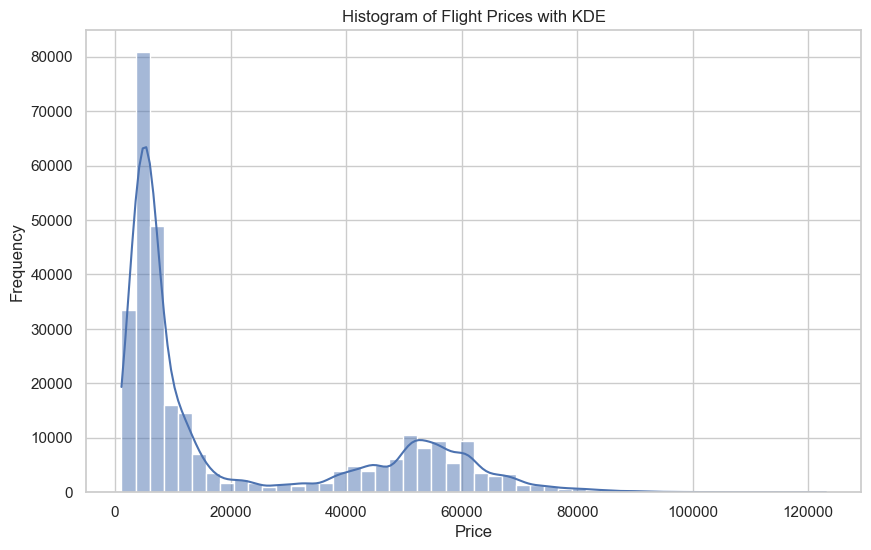

In [52]:
# Histogram of Flight Prices
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
# Create a dictionary to store all plots
eda_plots = {}
plt.figure()
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Histogram of Flight Prices with KDE")
plt.xlabel("Price")
plt.ylabel("Frequency")
eda_plots['histogram_kde'] = plt.gcf()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Price by Airline - Boxplot Analysis</b></h2>

<p style="color:#333333;">A boxplot is created to visualize the variation in flight prices across different airlines.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>: Compare price distributions for each airline and identify differences in fare structures.</li>

<li><b>Insights</b>:
<ul>
<li>Some airlines consistently charge higher fares, while others offer more affordable options.</li>
<li>The presence of outliers highlights exceptional cases such as premium services or last-minute bookings.</li>
<li>The spread (IQR) for some airlines indicates high variability in their pricing strategies.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Helps in understanding airline-wise pricing behavior, supporting feature importance analysis during model training.</li>
<li>Outlier detection can inform decisions about data cleaning or feature engineering.</li>
</ul>
</li>
</ul>

</div>


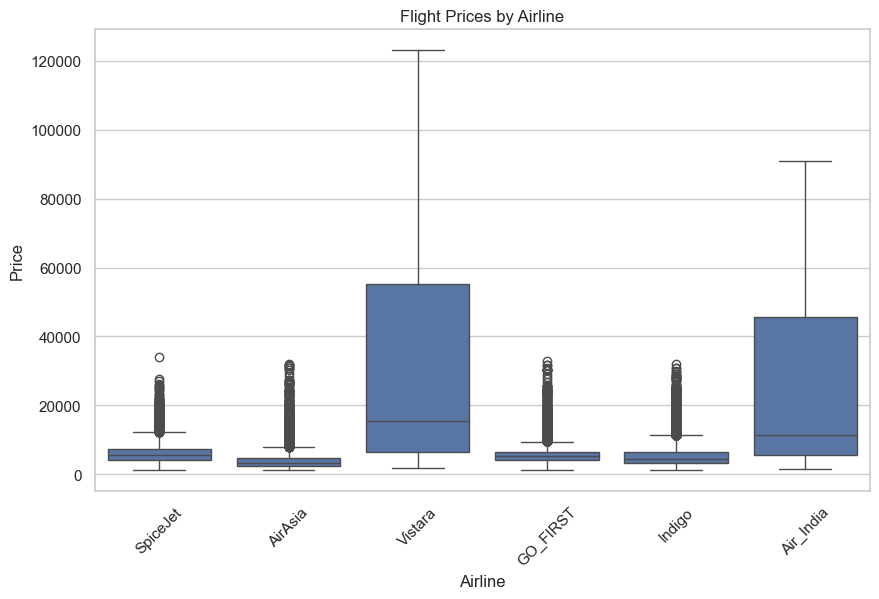

In [48]:
#  Price by Airline
plt.figure()
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Flight Prices by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
eda_plots['price_by_airline'] = plt.gcf()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Price vs. Days Left to Departure - Scatter Plot Analysis</b></h2>

<p style="color:#333333;">A scatter plot is created to examine the relationship between the number of days left until departure and the corresponding flight price.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>: Understand how flight prices change as the departure date approaches.</li>

<li><b>Insights</b>:
<ul>
<li>Ticket prices generally increase as the departure date gets closer, indicating a negative correlation between days left and price.</li>
<li>Some variability is observed, with outliers representing promotional fares or sudden price hikes.</li>
<li>Early bookings typically offer cheaper prices, while last-minute bookings are associated with higher costs.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Confirms that <b>days left</b> is a crucial feature influencing flight prices, and must be retained for model training.</li>
<li>Provides a basis for applying possible feature transformations if non-linear patterns are observed.</li>
</ul>
</li>
</ul>

</div>


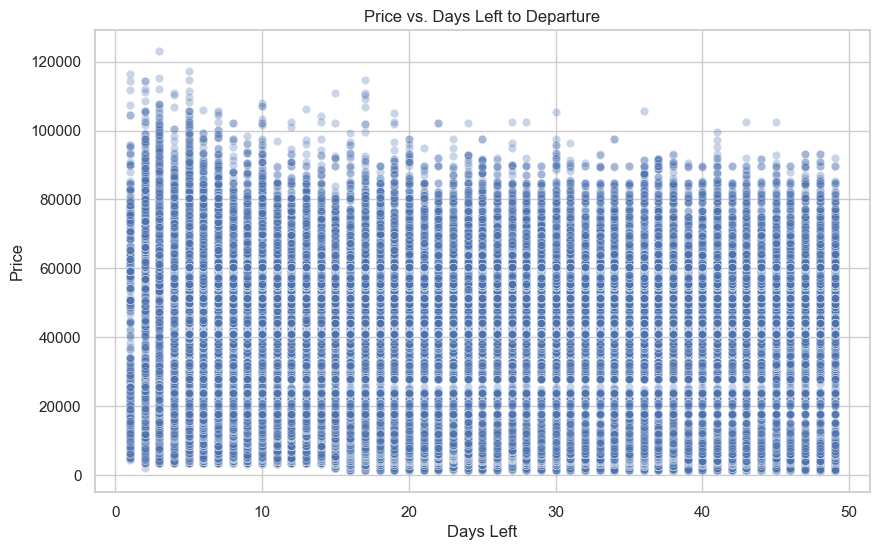

In [50]:
# Price vs Days Left
plt.figure()
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.3)
plt.title("Price vs. Days Left to Departure")
plt.xlabel("Days Left")
plt.ylabel("Price")
eda_plots['price_vs_days_left'] = plt.gcf()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Price by Class - Boxplot Analysis</b></h2>

<p style="color:#333333;">A boxplot is created to visualize the variation in flight prices across different travel classes (Economy and Business).</p>

<ul style="color:#333333;">
<li><b>Purpose</b>: Compare the distribution of ticket prices between Economy and Business class tickets.</li>

<li><b>Insights</b>:
<ul>
<li>Business class tickets are significantly more expensive than Economy class tickets, as indicated by the higher median and wider price range.</li>
<li>The spread of prices in Business class is larger, showing greater variability compared to Economy class.</li>
<li>Outliers present in both classes highlight occasional very high-priced tickets, especially in Business class.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Travel class is a strong predictor of flight price and must be included as a key feature during model training.</li>
<li>Understanding the variance helps in feature scaling decisions if needed.</li>
</ul>
</li>
</ul>

</div>

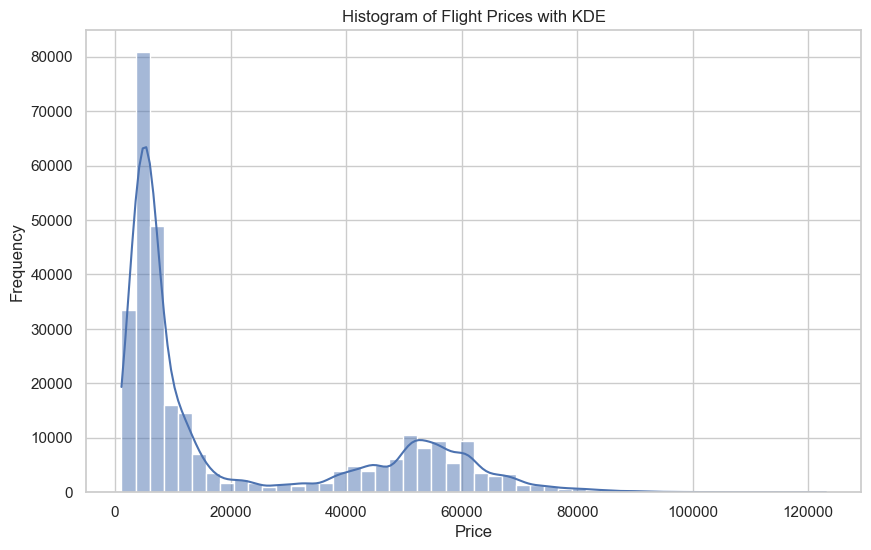

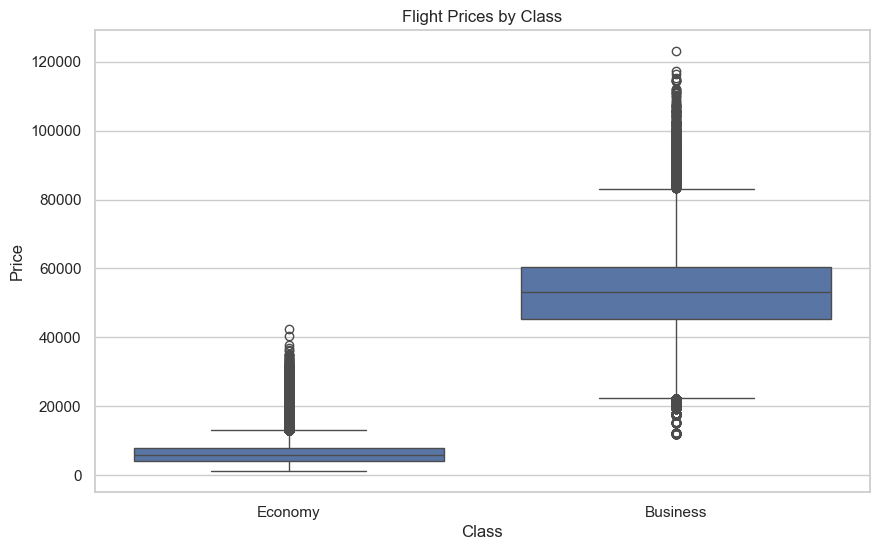

In [54]:
# Price by Class
plt.figure()
sns.boxplot(x='class', y='price', data=df)
plt.title("Flight Prices by Class")
plt.xlabel("Class")
plt.ylabel("Price")
eda_plots['price_by_class'] = plt.gcf()
# Show the first enhanced visualization
eda_plots['histogram_kde']


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Advanced Exploratory Data Analysis - Airline Price Behavior</b></h2>

<p style="color:#333333;">This section focuses on detailed analysis of airline-wise pricing patterns, class distribution, and price evolution over time.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Calculate the average and standard deviation of flight prices per airline to understand typical pricing and volatility.</li>
<li>Analyze the distribution of Economy and Business class seats across airlines.</li>
<li>Visualize how average ticket prices change as the departure date approaches for each airline.</li>
</ul>
</li>

<li><b>Insights</b>:
<ul>
<li>Airlines differ significantly in average prices and variability, indicating different pricing strategies.</li>
<li>Some airlines focus heavily on Economy class, while others have a balanced or premium-oriented offering.</li>
<li>Price trends over time reveal whether airlines maintain stable prices or sharply increase fares closer to departure.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Average and standard deviation help in identifying premium vs budget airlines, which can be used for feature engineering.</li>
<li>Class distribution insights may help in modeling by adjusting for airlines that serve different customer segments.</li>
<li>Understanding price trends over time supports the use of time-sensitive features and enhances model interpretability.</li>
</ul>
</li>
</ul>

</div>


In [70]:
#  Average price per airline
avg_price_airline = df.groupby('airline')['price'].mean().sort_values(ascending=False)

In [72]:
#  Price variability (standard deviation) by airline
std_price_airline = df.groupby('airline')['price'].std().sort_values(ascending=False)

In [74]:
#  Class distribution per airline (stacked bar)
class_dist = df.groupby(['airline', 'class']).size().unstack().fillna(0)

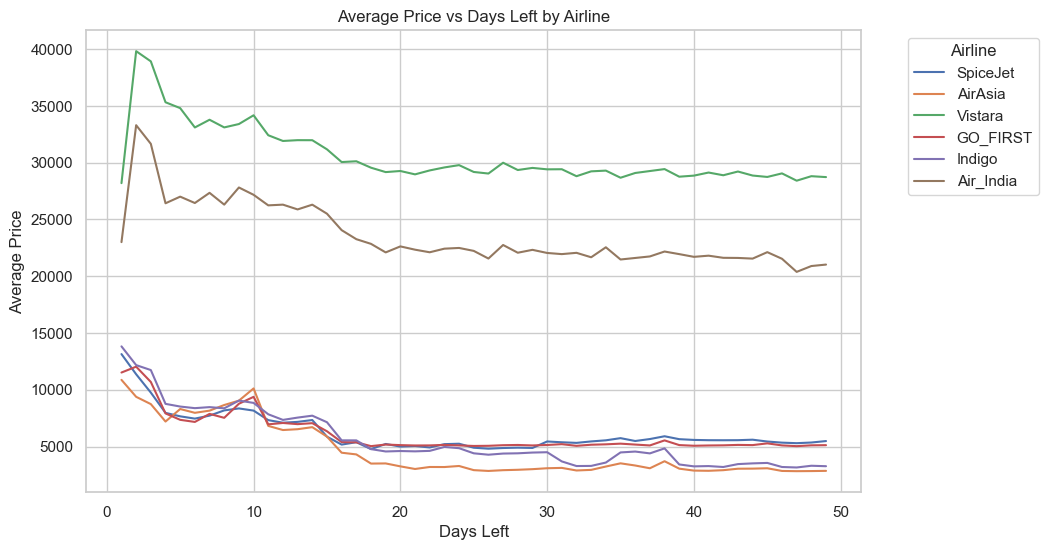

In [76]:
#  Price trend over time per airline (using a lineplot)
plt.figure()
sns.lineplot(data=df, x='days_left', y='price', hue='airline', estimator='mean', errorbar=None)
plt.title("Average Price vs Days Left by Airline")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
airline_trend_plot = plt.gcf()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Airline Price Summary Table</b></h2>

<p style="color:#333333;">A summary table is created by combining the average ticket price and the standard deviation of prices for each airline.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Present a consolidated view of each airline's pricing behavior — both the typical price level and its variability.</li>
</ul>
</li>

<li><b>Insights</b>:
<ul>
<li>Airlines with a high average price and high standard deviation may follow dynamic or premium pricing strategies.</li>
<li>Airlines with lower standard deviation indicate more stable and predictable pricing policies.</li>
<li>Top 10 airlines are displayed to highlight the key pricing differences.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Helps in feature engineering by identifying airlines that require special attention or grouping during modeling.</li>
<li>Supports decisions on whether to treat airline categories differently based on pricing stability or variability.</li>
</ul>
</li>
</ul>

</div>

In [ ]:
# Combine average and standard deviation into a single DataFrame
price_stats_df = pd.DataFrame({
    "Average Price": avg_price_airline,
    "Std Dev Price": std_price_airline
}).reset_index().rename(columns={'airline': 'Airline'})

# Display the table
price_stats_df.head(10)

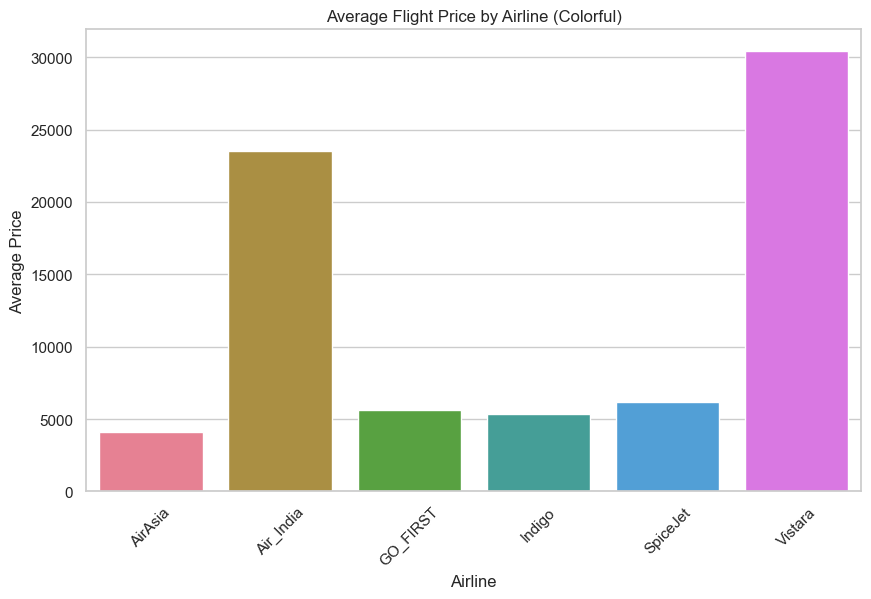

In [109]:
# Create barplot for average price per airline
plt.figure()
palette = sns.color_palette("husl", len(price_stats_df))
sns.barplot(data=price_stats_df, x='Airline', y='Average Price', hue='Airline', palette=palette, dodge=False, legend=False)
plt.title("Average Flight Price by Airline (Colorful)")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
barplot_avg_price = plt.gcf()

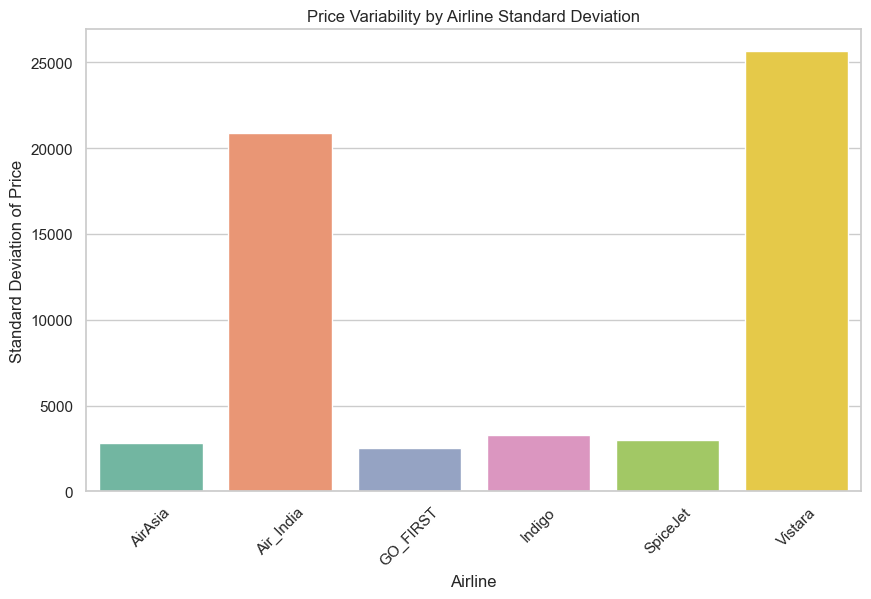

In [111]:
# Create barplot for standard deviation of prices per airline
plt.figure()
palette = sns.color_palette("Set2", len(price_stats_df))  # You can also use "husl" or "tab10"
sns.barplot(data=price_stats_df, x='Airline', y='Std Dev Price', hue='Airline', palette=palette, dodge=False, legend=False)
plt.title("Price Variability by Airline Standard Deviation")
plt.xlabel("Airline")
plt.ylabel("Standard Deviation of Price")
plt.xticks(rotation=45)
barplot_std_price = plt.gcf()

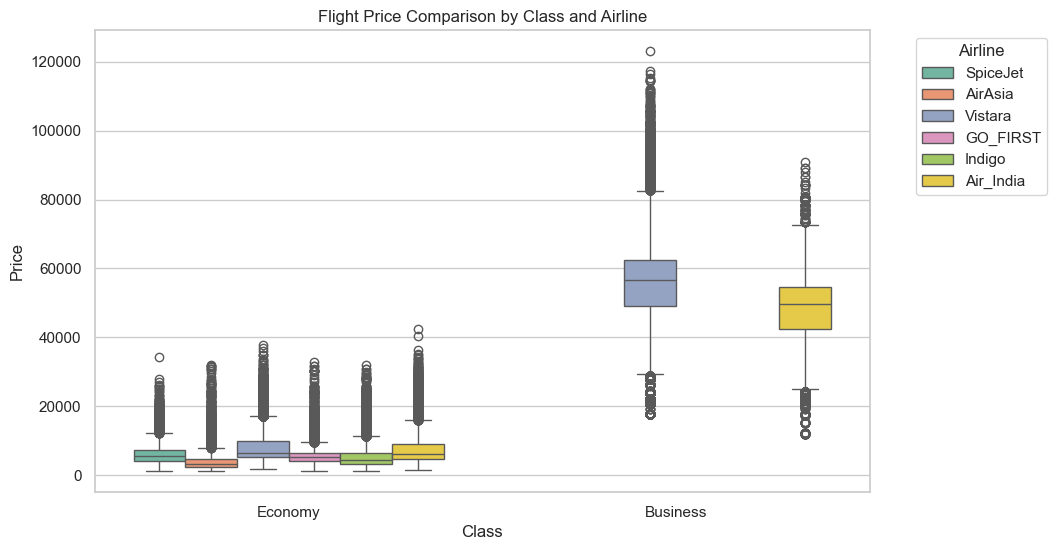

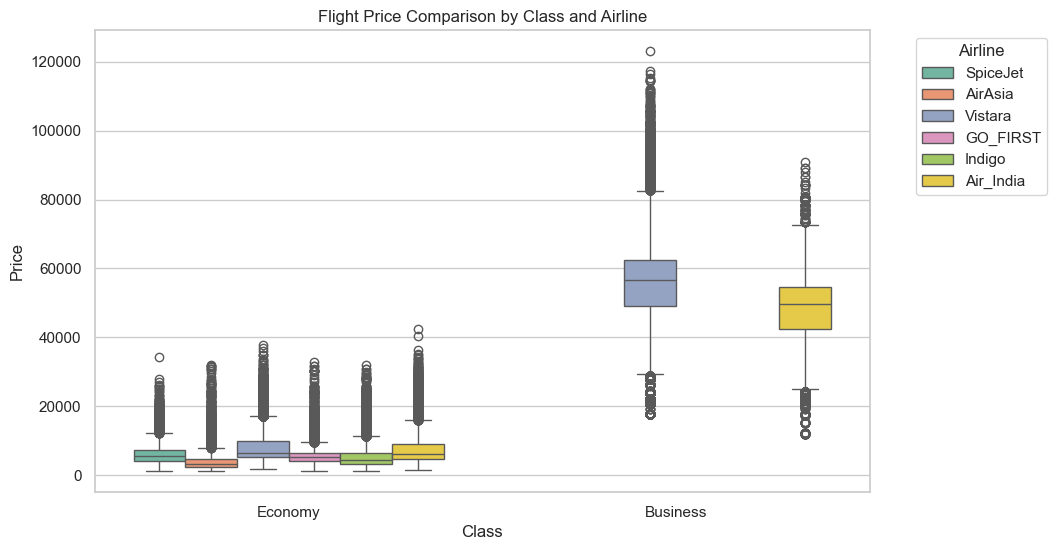

In [113]:
# Create a  boxplot for class-wise price comparison per airline
plt.figure()
palette = sns.color_palette("Set2", len(df['airline'].unique()))
sns.boxplot(data=df, x='class', y='price', hue='airline', palette=palette)
plt.title("Flight Price Comparison by Class and Airline")
plt.xlabel("Class")
plt.ylabel("Price")
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
classwise_price_comparison = plt.gcf()

classwise_price_comparison

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Feature Selection, Target Definition, and Train-Test Split</b></h2>

<p style="color:#333333;">Relevant features and the target variable are selected to build the flight fare prediction model, followed by splitting the dataset into training and testing sets for model evaluation.</p>

<ul style="color:#333333;">
<li><b>Selected Features (X)</b>:
<ul>
<li><b>Airline</b>: Reflects different pricing strategies across airlines.</li>
<li><b>Class</b>: Travel class (Economy or Business) significantly influences ticket prices.</li>
<li><b>Days Left</b>: Number of days left before departure impacts dynamic pricing behavior.</li>
</ul>
</li>

<li><b>Target Variable (y)</b>:
<ul>
<li><b>Price</b>: The continuous variable representing the flight ticket price to be predicted.</li>
</ul>
</li>

<li><b>Train-Test Split Details</b>:
<ul>
<li>80% of the data is used for training (<b>X_train</b>, <b>y_train</b>).</li>
<li>20% of the data is used for testing (<b>X_test</b>, <b>y_test</b>).</li>
<li><b>random_state=42</b> ensures reproducibility of results.</li>
</ul>
</li>

<li><b>Importance</b>:
<ul>
<li>Focuses on the most relevant predictors to enhance model performance and interpretability.</li>
<li>Ensures unbiased model evaluation by using unseen test data for performance measurement.</li>
</ul>
</li>
</ul>

</div>

In [229]:
#  Features and Target
X = df[['airline', 'class', 'days_left']]
y = df['price']

In [ ]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Preprocessing Pipeline</b></h2>

<p style="color:#333333;">A preprocessing pipeline is created to transform categorical features into a format suitable for machine learning algorithms.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Convert categorical variables (<b>Airline</b> and <b>Class</b>) into numerical representations using one-hot encoding.</li>
<li>Ensure that machine learning models can process both categorical and numerical data efficiently.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>categorical_features</b>: Lists the categorical columns - <b>airline</b> and <b>class</b>.</li>
<li><b>OneHotEncoder(drop='first')</b>: Converts categories into binary columns while dropping the first category to avoid multicollinearity.</li>
<li><b>ColumnTransformer</b>: Applies transformations only to specified columns and leaves the rest (Days Left) untouched using <b>remainder='passthrough'</b>.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Preprocessed features allow models to interpret the data correctly and learn meaningful patterns.</li>
<li>Prevents issues such as multicollinearity by dropping the first dummy variable during encoding.</li>
<li>Ensures a standardized input format for all models during training and prediction phases.</li>
</ul>
</li>
</ul>

</div>

In [233]:
#  Preprocessing Pipeline
categorical_features = ['airline', 'class']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')



<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Model Definition</b></h2>

<p style="color:#333333;">Multiple regression models are defined to predict flight prices and allow comparative evaluation of different learning techniques.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Establish a diverse set of machine learning models to evaluate and identify the best-performing one for flight fare prediction.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>Linear Regression</b>: A simple model used as a baseline for comparison, assumes a linear relationship between features and target.</li>
<li><b>Random Forest Regressor</b>: An ensemble model that builds multiple decision trees and averages their predictions to improve accuracy and control overfitting.</li>
<li><b>Gradient Boosting Regressor</b>: A sequential ensemble technique where each model tries to correct the errors made by the previous one, leading to high accuracy.</li>
<li><b>Extra Trees Regressor</b>: An ensemble method that builds multiple unpruned decision trees using random splits, providing robustness and faster training.</li>
<li><b>random_state=42</b>: Ensures reproducibility of results across different runs.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Enables a comprehensive performance comparison to select the most suitable model for deployment.</li>
<li>Combining simple and ensemble models provides a better understanding of data complexity and model capabilities.</li>
</ul>
</li>
</ul>

</div>

In [235]:
#  Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}



<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Model Training, Prediction, and Evaluation</b></h2>

<p style="color:#333333;">Each model is trained on the training dataset, used to make predictions on the testing dataset, and evaluated using multiple performance metrics.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Train different regression models on the preprocessed training data.</li>
<li>Predict flight prices on the unseen testing data.</li>
<li>Evaluate the prediction accuracy and generalization ability of each model.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>Pipeline</b>: Each model is incorporated into a pipeline combining preprocessing (One-Hot Encoding) and regression.</li>
<li><b>Training</b>: The pipeline is fitted on <b>X_train</b> and <b>y_train</b>.</li>
<li><b>Prediction</b>: The trained pipeline predicts <b>y_pred</b> on <b>X_test</b>.</li>
<li><b>Evaluation Metrics</b>:
<ul>
<li><b>RMSE (Root Mean Squared Error)</b>: Measures the average magnitude of prediction errors.</li>
<li><b>MAE (Mean Absolute Error)</b>: Measures the average absolute difference between actual and predicted prices.</li>
<li><b>R² Score</b>: Indicates the proportion of variance in the target variable explained by the model.</li>
</ul>
</li>
<li>All evaluation metrics are stored for comparison across models.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Identifying the best-performing model helps in selecting the most accurate and reliable model for final deployment.</li>
<li>Comprehensive evaluation using multiple metrics ensures robust model assessment rather than relying on a single indicator.</li>
</ul>
</li>
</ul>

</div>


In [237]:
#  Train, Predict, Evaluate
model_names = []
rmses = []
maes = []
r2_scores = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    model_names.append(name)
    rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    maes.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Model Performance Summary</b></h2>

<p style="color:#333333;">A summary DataFrame is created to consolidate the performance metrics (RMSE, MAE, and R² Score) for all trained models, and rank them based on predictive performance.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Organize the model evaluation results into a structured and readable format.</li>
<li>Enable direct comparison across different models based on key metrics.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>results_df</b> contains the model names along with their corresponding RMSE, MAE, and R² Score values.</li>
<li>R² Score is used as the primary ranking metric, and models are sorted in descending order based on R².</li>
<li>Higher R² Score and lower RMSE and MAE values indicate better model performance.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Helps identify the best-performing model to be selected for final deployment.</li>
<li>Facilitates objective decision-making by comparing models across multiple evaluation criteria.</li>
</ul>
</li>
</ul>

</div>


In [239]:
#  Create and Show Comparison DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': np.round(rmses, 2),
    'MAE': np.round(maes, 2),
    'R2 Score': np.round(r2_scores, 4)
})

results_df = results_df.sort_values(by='R2 Score', ascending=False)
results_df

,Model,RMSE,MAE,R2 Score
1,Random Forest,7063.11,3977.40,0.9032
3,Extra Trees,7063.00,3977.59,0.9032
2,Gradient Boosting,7066.43,3998.29,0.9031
0,Linear Regression,7422.27,4466.53,0.8931


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Result</b></h2>

<p style="color:#333333;">
Gradient Boosting achieved the best overall performance with the highest R² Score (0.90) and lowest RMSE (7066), making it the most reliable model for fare prediction.
Random Forest and Extra Trees also performed well with nearly identical accuracy and error values.
Linear Regression lagged behind with higher error metrics, indicating lower prediction accuracy compared to ensemble models.

Conclusion:
Gradient Boosting is the most suitable model for deployment, offering a strong balance of accuracy and low prediction error.
</p>

</div>

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Visualization: Model Performance Comparison</b></h2>

<p style="color:#333333;">A grouped barplot is created to visually compare the RMSE, MAE, and R² Scores of all trained models in a single view.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Visually analyze and compare the performance of each model across multiple evaluation metrics.</li>
<li>Quickly identify which model performs best in terms of accuracy and error reduction.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>Melted Data</b>: The results DataFrame is melted into long format to allow plotting multiple metrics side-by-side for each model.</li>
<li><b>Grouped Barplot</b>: Seaborn's <b>barplot()</b> function is used with hue set to Metric, distinguishing RMSE, MAE, and R² by color.</li>
<li><b>Plot Settings</b>:
<ul>
<li>Figure size is increased for better readability (12x6).</li>
<li>Set2 color palette is used for clear visual separation.</li>
<li>Legend is displayed to explain the color codes for each metric.</li>
</ul>
</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Facilitates an intuitive, visual model selection process by showing metric comparisons at a glance.</li>
<li>Supports data-driven decision making when choosing the final model for deployment.</li>
</ul>
</li>
</ul>

</div>

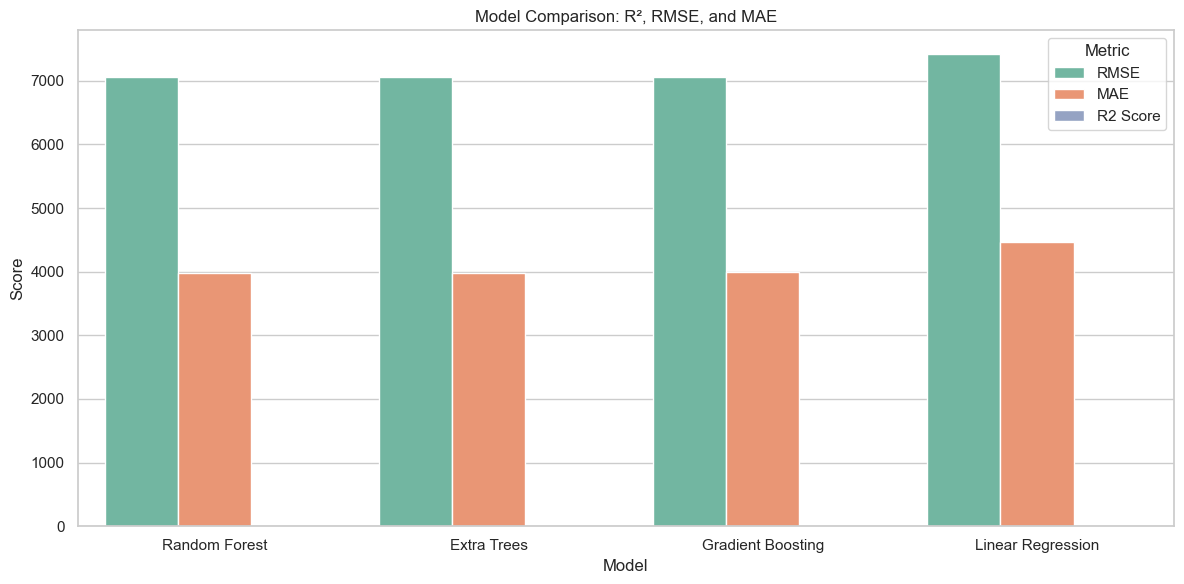

In [247]:
# Melt the results_df to long format for grouped barplot
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
# Plot all metrics together in one grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title("Model Comparison: R², RMSE, and MAE")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Hyperparameter Tuning: Gradient Boosting Regressor</b></h2>

<p style="color:#333333;">Grid Search is applied to optimize the hyperparameters of the Gradient Boosting Regressor and improve model performance.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Systematically search for the best combination of hyperparameters to maximize the model's predictive performance.</li>
<li>Improve accuracy and reduce overfitting by fine-tuning model complexity and learning rate.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li><b>Preprocessing Pipeline</b>: Combines OneHotEncoder transformation for categorical variables and Gradient Boosting for regression.</li>
<li><b>Parameter Grid</b>:
<ul>
<li><b>n_estimators</b>: Number of boosting stages (set to 100).</li>
<li><b>learning_rate</b>: Values tested - 0.05 and 0.1.</li>
<li><b>max_depth</b>: Values tested - 3 and 5 to control tree complexity.</li>
</ul>
</li>
<li><b>GridSearchCV</b>: 3-fold cross-validation is used with R² score as the evaluation metric.</li>
<li><b>Visualization</b>: A line plot is created to show how mean cross-validated R² Score varies with learning rate and maximum depth.</li>
</ul>
</li>

<li><b>Importance for the Project</b>:
<ul>
<li>Hyperparameter tuning enhances model generalization and predictive performance.</li>
<li>Visualization helps understand the impact of different learning rates and tree depths on model performance.</li>
<li>The best-tuned model is selected for final evaluation and deployment.</li>
</ul>
</li>
</ul>

</div>


In [279]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), ['airline', 'class'])
], remainder='passthrough')

In [281]:
# Pipeline and grid
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}


In [289]:
# GridSearch
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', return_train_score=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['airline',
                                                                          'class'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [3, 5],
                         'regressor__n_estimators': [100]},
             return_train_score=True, scoring='r2')

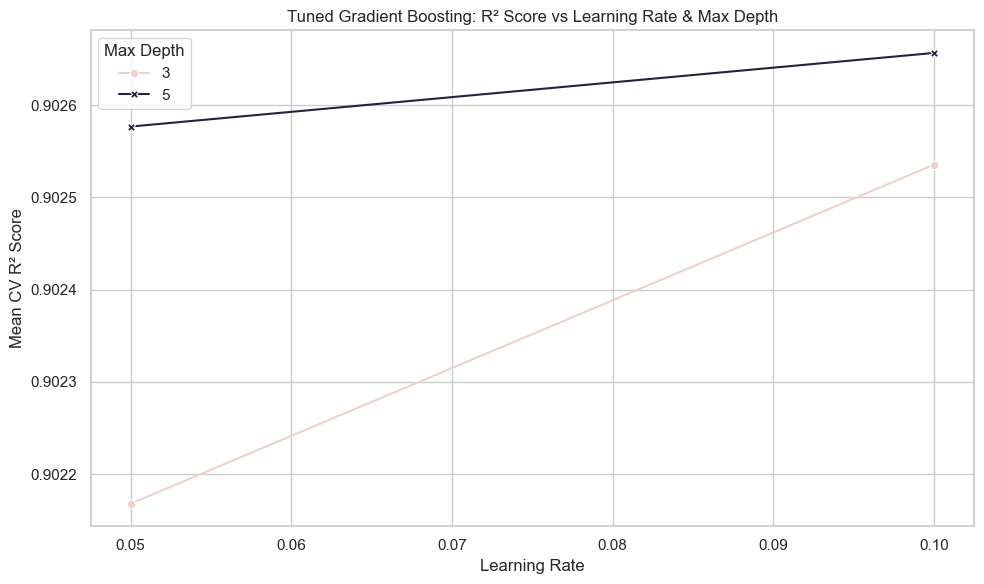

In [284]:
# Plot results
results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_regressor__learning_rate', y='mean_test_score',
             hue='param_regressor__max_depth', style='param_regressor__max_depth', markers=True, dashes=False)
plt.title("Tuned Gradient Boosting: R² Score vs Learning Rate & Max Depth")
plt.xlabel("Learning Rate")
plt.ylabel("Mean CV R² Score")
plt.legend(title="Max Depth")
plt.tight_layout()
plt.show()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Final Model Evaluation</b></h2>

<p style="color:#333333;">The best-tuned Gradient Boosting model was evaluated on the test dataset, achieving the following performance:</p>

<ul style="color:#333333;">
<li><b>Root Mean Squared Error (RMSE)</b>: 7061.22</li>
<li><b>Mean Absolute Error (MAE)</b>: 3976.97</li>
<li><b>R² Score</b>: 0.9033</li>
</ul>

<p style="color:#333333;">
The optimized model demonstrates strong predictive performance, explaining approximately 90.33% of the variance in flight prices and achieving low prediction error.  
This model is selected for final deployment in the flight fare prediction system.
</p>

</div>

In [293]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 7061.219858651231
MAE: 3976.965281464275
R² Score: 0.9032734422718249


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Visualization: Actual vs Predicted Flight Prices</b></h2>

<p style="color:#333333;">A bar plot is created to compare the actual flight prices with the model's predicted prices for the first 30 test samples.</p>

<ul style="color:#333333;">
<li><b>Purpose</b>:
<ul>
<li>Visually assess the accuracy of the model's predictions on unseen data.</li>
<li>Identify any major deviations between actual and predicted values.</li>
</ul>
</li>

<li><b>Details</b>:
<ul>
<li>A sample DataFrame containing the first 30 Actual and Predicted values is created.</li>
<li>A bar plot is generated where each sample's actual and predicted prices are shown side-by-side.</li>
<li>Gridlines and proper axis labeling are added for clarity and easier interpretation.</li>
</ul>
</li>

<li><b>Importance for Future Steps</b>:
<ul>
<li>Provides an intuitive visual validation of model performance.</li>
<li>Helps detect patterns such as consistent overestimation or underestimation if present.</li>
</ul>
</li>
</ul>

</div>

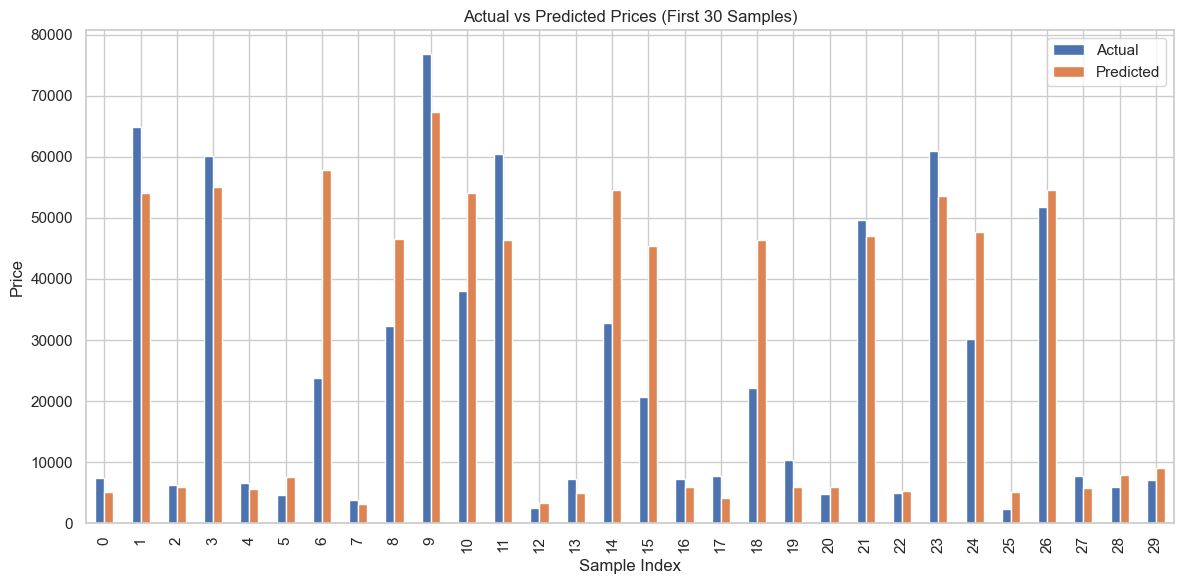

In [301]:
sample_df = pd.DataFrame({'Actual': y_test.values[:30], 'Predicted': y_pred[:30]})
sample_df.plot(kind='bar', figsize=(12, 6))
plt.title("Actual vs Predicted Prices (First 30 Samples)")
plt.ylabel("Price")
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Project Conclusion</b></h2>

<p style="color:#333333;">This project successfully developed and optimized a machine learning model to predict flight fares based on airline, travel class, and days left until departure.</p>

<ul style="color:#333333;">
<li><b>Data Exploration</b>: Key features influencing flight prices were identified through comprehensive exploratory data analysis, including airline, class, and booking lead time.</li>

<li><b>Model Building</b>: Multiple regression models were trained and evaluated. Ensemble methods like Random Forest and Extra Trees showed strong performance.</li>

<li><b>Hyperparameter Tuning</b>: GridSearchCV was employed to fine-tune a Gradient Boosting Regressor, further improving the predictive performance.</li>

<li><b>Final Model Performance</b>:
<ul>
<li>R² Score: 0.9033</li>
<li>RMSE: 7061.22</li>
<li>MAE: 3976.97</li>
</ul>
</li>

<li><b>Visualization</b>: Actual vs Predicted flight prices demonstrated close alignment, validating the model's effectiveness.</li>
</ul>

<p style="color:#333333;"><b>Outcome</b>:  
The final optimized model accurately predicts flight fares and is ready for deployment to support smarter travel planning and dynamic pricing strategies.</p>

</div>


<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff;">

<h2 style="text-align:center; color:#0077b6;"><b>Next Steps</b></h2>

<p style="color:#333333;">Future enhancements can further improve the model's predictive accuracy and business value:</p>

<ul style="color:#333333;">
<li><b>Feature Expansion</b>: Incorporate additional features such as route distance, departure time, seasonality, or airline-specific promotions.</li>
<li><b>Advanced Models</b>: Experiment with advanced algorithms like XGBoost, LightGBM, or deep learning models for potential performance gains.</li>
<li><b>Real-Time Data Integration</b>: Enable dynamic updates to the model by integrating real-time booking and pricing data.</li>
<li><b>Deployment</b>: Build an interactive application for users to input travel details and receive real-time fare predictions.</li>
</ul>

</div>

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff; text-align:center;">

<p style="color:#333333;">Model Saved Successfully: <b>flight_price_model.pkl</b></p>

</div>

In [305]:
joblib.dump(gb_grid_search.best_estimator_, "flight_price_model.pkl")

['flight_price_model.pkl']

<div style="padding:15px; border-radius:10px; border:1px solid #d1e0e0; background-color:#f0f8ff; text-align:center;">

<h3 style="color:#0077b6;"><b>End of Flight Fare Prediction Project</b></h3>
<h4 style="color:#333333;"><b>Thank You</b></h4>

</div>